In [503]:
!pip install matplotlib

In [504]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [505]:
df = pd.read_csv('spam.csv')

In [506]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [507]:
df.dropna(axis=1, inplace=True)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [509]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [510]:
df.describe()

,target,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [511]:
df.duplicated().sum()

414

In [512]:
df.drop_duplicates(inplace=True)

In [513]:
df.describe()

,target,text
count,5158,5158
unique,2,5158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [514]:
df.shape

(5158, 2)

<AxesSubplot:>

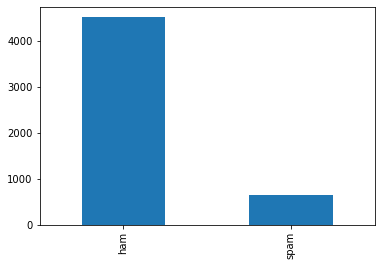

In [515]:
df['target'].value_counts().plot(kind='bar')

In [516]:
def preprocess_text(text):
    text = text.strip().lower()
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text_tokens = word_tokenize(text)
    text_tokens = [text_token for text_token in text_tokens if text_token.isalpha()]
    text_tokens = [text_token.translate(str.maketrans('', '', string.punctuation)) for text_token in text_tokens]
    stemmer = PorterStemmer()
    text_tokens = [stemmer.stem(text_token) for text_token in text_tokens if not text_token in set(stopwords.words('english'))]
    text = ' '.join(text_tokens)
    return text

In [517]:
df['clean_text'] = df['text'].apply(preprocess_text)

In [518]:
df.head()

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [519]:
cv = TfidfVectorizer()
X = cv.fit_transform(df['clean_text']).toarray()
cv.vocabulary_

{'go': 2050,
 'jurong': 2662,
 'point': 3809,
 'crazi': 1113,
 'avail': 359,
 'bugi': 701,
 'great': 2117,
 'world': 5700,
 'la': 2758,
 'buffet': 699,
 'cine': 921,
 'got': 2086,
 'amor': 179,
 'wat': 5539,
 'ok': 3508,
 'lar': 2786,
 'joke': 2633,
 'wif': 5629,
 'oni': 3531,
 'free': 1903,
 'entri': 1589,
 'wkli': 5668,
 'comp': 1004,
 'win': 5639,
 'fa': 1697,
 'cup': 1159,
 'final': 1790,
 'tkt': 5154,
 'may': 3075,
 'text': 5050,
 'receiv': 4094,
 'question': 4015,
 'std': 4779,
 'txt': 5301,
 'rate': 4058,
 'appli': 248,
 'dun': 1475,
 'say': 4327,
 'earli': 1490,
 'hor': 2335,
 'alreadi': 157,
 'nah': 3301,
 'think': 5092,
 'goe': 2054,
 'usf': 5407,
 'live': 2886,
 'around': 285,
 'though': 5107,
 'freemsg': 1909,
 'hey': 2272,
 'darl': 1203,
 'week': 5566,
 'word': 5694,
 'back': 393,
 'like': 2858,
 'fun': 1949,
 'still': 4800,
 'tb': 5005,
 'xxx': 5753,
 'chg': 880,
 'send': 4394,
 'rcv': 4068,
 'even': 1632,
 'brother': 675,
 'speak': 4691,
 'treat': 5247,
 'aid': 115,
 'pa

In [520]:
label_encoder = LabelEncoder().fit(df['target'])
y = label_encoder.transform(df['target'])
label_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [521]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3)

In [522]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.917900,1.000000,0.957193,3164.000000
1,1.000000,0.366890,0.536825,447.000000
accuracy,0.921628,0.921628,0.921628,0.921628
macro avg,0.958950,0.683445,0.747009,3611.000000
weighted avg,0.928063,0.921628,0.905156,3611.000000


In [523]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.921014,0.998736,0.958302,3164.000000
1,0.977778,0.393736,0.561404,447.000000
accuracy,0.923844,0.923844,0.923844,0.923844
macro avg,0.949396,0.696236,0.759853,3611.000000
weighted avg,0.928041,0.923844,0.909170,3611.000000
